<a href="https://colab.research.google.com/github/pooyalHsu/20230205python/blob/main/20230225%E7%B7%B4%E7%BF%92%E5%8F%B0%E7%A9%8D%E9%9B%BB%E6%95%B8%E6%93%9A%E5%8F%96%E5%BE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 分析台積電的股價 (2330.tw)

* 下載歷史股價
* 分析歷史股價第一筆到最近一筆資料的資產變化情形
* 分析2022年至2023年間,從何時切入投資報酬率最大
* 繪製台積電收盤價曲線


In [58]:
import yfinance as yf
import pandas as pd

# 下載 TSMC 股票數據
tsmc = yf.download('TSM')


# 打印前幾行數據
print(tsmc.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1997-10-09  5.646040  6.562691  5.646040  6.323565   3.289080  10201979
1997-10-10  7.014374  7.040944  6.363419  6.615830   3.441097  10669148
1997-10-13  6.629115  6.629115  6.443128  6.469698   3.365088   3044363
1997-10-14  6.416558  6.429843  6.031299  6.204002   3.226891   2549907
1997-10-15  5.818742  6.044584  5.805458  6.031299   3.137064   3167153


In [60]:
import matplotlib.pyplot as plt

In [66]:
# 計算每天的報酬率
daily_returns = tsmc['Adj Close'].pct_change()

# 設置不同的持有期
holding_periods = [30, 60]

# 記錄每個持有期的起始和結束日期，以及對應的總報酬率
results = []
for holding_period in holding_periods:
    total_returns = daily_returns.rolling(holding_period).apply(lambda x: (x+1).prod() - 1)
    max_return = total_returns.max()
    start_date = total_returns.idxmax()
    end_date = start_date + pd.DateOffset(days=holding_period-1)
    results.append({'holding_period': holding_period,
                    'start_date': start_date,
                    'end_date': end_date,
                    'total_return': max_return})

# 打印結果
for result in results:
    print('持有期：{} 天，最高報酬率：{:.2f}%，投資期間：{} - {}'.format(result['holding_period'],
                                                           result['total_return']*100,
                                                           result['start_date'].strftime('%Y-%m-%d'),
                                                           result['end_date'].strftime('%Y-%m-%d')))


持有期：30 天，最高報酬率：92.95%，投資期間：1998-02-25 - 1998-03-26
持有期：60 天，最高報酬率：103.99%，投資期間：2001-12-14 - 2002-02-11


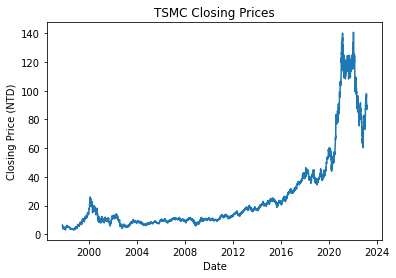

In [67]:
# 繪製收盤價曲線
plt.plot(tsmc['Close'])

# 設置圖表標題和軸標籤
plt.title('TSMC Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (NTD)')

# 顯示圖表
plt.show()